# Data Pre-processing for Group assignment

## Part 1: Formatting and merge datasets

In this part, we will tidy the form of two raw datasets, and finally merge them into one dataset.

### 1.1  Formatting Food Security Indicators dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
# read in dataset
df1=pd.read_csv('ASEAN_Food Security Indicators-raw.csv')
df1.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,123,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,125,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,127,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,127,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,127,F,FAO estimate,NaN


In [3]:
# drop useless or duplicated columns
df1=df1.drop(['Domain Code', 'Domain','Area Code (FAO)', 'Year Code','Element Code','Element',
            'Item Code','Unit', 'Flag',
              'Flag Description','Note'], axis=1)
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2000-2002,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001-2003,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002-2004,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003-2005,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004-2006,127


In [4]:
# Compute missing values
df1.isnull().sum()

Area       0
Item       0
Year       0
Value    124
dtype: int64

In [5]:
# Impute missing values to 0 temporarily
df1.fillna(0,inplace=True)
print(df1.isnull().sum())

Area     0
Item     0
Year     0
Value    0
dtype: int64


In [6]:
# Formatting 'Year' column
for i in range(len(df1)):
    if len(df1.iloc[i,2])==9:
        df1.iloc[i,2]=int((int(df1.iloc[i,2][0:4])+int(df1.iloc[i,2][5:]))/2)
        pass
    elif len(df1.iloc[i,2])==4:
        df1.iloc[i,2]=int(df1.iloc[i,2])
        pass
    else:
        print('There is an error in Year column')
        pass
    pass
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2005,127


In [7]:
# Formatting 'Value' column
df1['Value'] = df1.Value.apply(str)
index = df1[df1['Value'].str.contains('<'or'>')].index
for i in index:
    df1.iloc[i,3] = df1.iloc[i,3][1:]
    pass
df1['Value'] = pd.to_numeric(df1['Value'], downcast='float')

In [8]:
# values in 'Item' column contains variables we need to analysis
# should be transferred to key:value format
print(len(df1.Item.unique()))     #compute variable numbers
# Transferred Item
from pandas.core.reshape.reshape import pivot
df1=df1.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df1=df1.reset_index()
df1.head()

42


Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of exclusive breastfeeding among infants 0-5 months of age,Prevalence of low birthweight (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,17.100000,NaN,10.3,NaN,7.2,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,16.600000,NaN,9.5,NaN,7.5,NaN,2.6,NaN,50.0,5.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,16.299999,NaN,9.2,NaN,7.9,NaN,2.5,NaN,48.0,4.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,16.000000,NaN,9.1,NaN,8.2,NaN,2.5,NaN,47.0,4.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,15.700000,NaN,9.2,NaN,8.6,NaN,2.5,NaN,46.0,4.0


### 1.2 Formatting Consumer Price indices dataset

In [9]:
# read in dataset
df2=pd.read_csv('ASEAN_Consumer Price Indices-raw.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,96,Brunei Darussalam,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,88.959933,F,FAO estimate,base year is 2015
1,CP,Consumer Price Indices,96,Brunei Darussalam,2001,2001,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.702503,F,FAO estimate,base year is 2015
2,CP,Consumer Price Indices,96,Brunei Darussalam,2002,2002,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.146512,F,FAO estimate,base year is 2015
3,CP,Consumer Price Indices,96,Brunei Darussalam,2003,2003,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.365320,F,FAO estimate,base year is 2015
4,CP,Consumer Price Indices,96,Brunei Darussalam,2004,2004,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.822766,F,FAO estimate,base year is 2015


In [10]:
# drop useless or duplicated variables
df2=df2.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
df2.head()

,Area,Year,Item,Months,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",January,88.959933
1,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",January,89.702503
2,Brunei Darussalam,2002,"Consumer Prices, Food Indices (2015 = 100)",January,90.146512
3,Brunei Darussalam,2003,"Consumer Prices, Food Indices (2015 = 100)",January,90.365320
4,Brunei Darussalam,2004,"Consumer Prices, Food Indices (2015 = 100)",January,89.822766


In [11]:
# split 'Months' column into separate columns
from pandas.core.reshape.reshape import pivot
df2=df2.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
df2=df2.reset_index()
df2.head()

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571


In [12]:
# impute na using mean method
df2_1=df2.iloc[:,3:15]
a1=np.where(np.isnan(df2_1))[0]
a2=np.where(np.isnan(df2_1))[1]
for i in a1:
    for j in a2:
        df2_1.iloc[i,j]=df2_1.iloc[i].mean()

In [13]:
# add new column by mean value of months
df2['Value']=df2_1.apply(lambda x: x.mean(),axis=1)

In [14]:
# drop months columns
df2=df2.drop(['January','February','March','April','May','June','July','August','September','October','November','December'], axis=1)
df2.head()

Months,Area,Year,Item,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",95.709930
4,Brunei Darussalam,2001,Food price inflation,0.671642


In [15]:
# split the 'Item' column into Food Indices, General Indices, and inflation rates
df2=df2.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df2=df2.reset_index()
df2.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


### 1.3 Combine two datasets

In [16]:
#combine two dataframes
data=pd.merge(df1,df2,on=['Area','Year'],sort=True)
data.head()

Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,NaN,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,NaN,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,NaN,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,NaN,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782


### 1.4 Save data

In [25]:
data.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-merged.csv',index=False)

## Part 2: Handle missing data

In this part, we use Random Forest Regressor model combined mean method to impute missing values.

### 2.1 Initial understanding of the dataset

In [20]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
# read in dataset
df=pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-merged.csv')
df.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.7,87.4,45.4,81.0,100.0,0.21,...,NaN,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,2337.0,125.0,78.7,89.7,47.7,85.0,99.6,0.21,...,NaN,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,2345.0,127.0,81.7,90.3,48.3,86.0,95.7,0.21,...,NaN,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,2352.0,127.0,81.0,88.6,47.3,76.0,93.8,0.21,...,NaN,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782


In [27]:
# See the dimension of dataset
print('The dataset contains', np.shape(df)[0], 'rows and', np.shape(df)[1], 'columns.')

The dataset contains 210 rows and 47 columns.


#### See the distribution of missing data

We imputed some missing values by zero for necessary when formatting the dataset, now first we change them back to NaNs.

In [28]:
for i in range(np.shape(df)[0]):
    for j in range(np.shape(df)[1]):
        if df.iloc[i,j] == 0:
            df.iloc[i,j] = float('NaN')

In [29]:
# Calculate NaNs of each column
df.isnull().sum()

Area                                                                                                                0
Year                                                                                                                0
Average dietary energy requirement (kcal/cap/day)                                                                   0
Average dietary energy supply adequacy (percent) (3-year average)                                                  39
Average fat supply (g/cap/day) (3-year average)                                                                    60
Average protein supply (g/cap/day) (3-year average)                                                                60
Average supply of protein of animal origin (g/cap/day) (3-year average)                                            60
Average value of food production (constant 2004-2006 I$/cap) (3-year average)                                      40
Cereal import dependency ratio (percent) (3-year average

### 2.2 Imputation of missing data

#### Step 1: test correlation between complete columns and incomplete columns

In [30]:
# Create categorical variables from string variable
df['Area_cat'] = df['Area'].astype('category')
df['Area_cat'] = df['Area_cat'].cat.codes
# reindex dataset
df = df.reindex(columns = df.columns)
# create df1 with no str variables to test correlation
df1 = df.drop('Area', axis = 1)

##### Create correlation table

In [31]:
def create_correlation_table(df):
    complete_col = df.loc[:,df.isnull().sum() == 0].columns
    incomplete_col=df.loc[:,df.isnull().sum() != 0].columns
    li1 = []; li2 = []; li3 = []
    for i in incomplete_col:
        for j in complete_col:
            li1.append(i)
            li2.append(j)
            li3.append(df[i].corr(df[j]))
    df_r = {'Incomplete Variables':li1,
           'Complete Variables':li2,
           'PPMCC':li3}
    df_r = pd.DataFrame(df_r)
    return df_r

In [32]:
df1_r = create_correlation_table(df1) 
df1_r

,Incomplete Variables,Complete Variables,PPMCC
0,Average dietary energy supply adequacy (percen...,Year,0.563240
1,Average dietary energy supply adequacy (percen...,Average dietary energy requirement (kcal/cap/day),0.376543
2,Average dietary energy supply adequacy (percen...,"Gross domestic product per capita, PPP, dissem...",0.587843
3,Average dietary energy supply adequacy (percen...,Minimum dietary energy requirement (kcal/cap/...,0.373129
4,Average dietary energy supply adequacy (percen...,Number of children under 5 years of age who ar...,0.152125
5,Average dietary energy supply adequacy (percen...,Number of children under 5 years of age who ar...,-0.035140
6,Average dietary energy supply adequacy (percen...,Percentage of children under 5 years of age wh...,0.492947
7,Average dietary energy supply adequacy (percen...,Percentage of children under 5 years of age wh...,-0.685287
8,Average dietary energy supply adequacy (percen...,Percentage of population using at least basic ...,0.750141
9,Average dietary energy supply adequacy (percen...,"Consumer Prices, Food Indices (2015 = 100)",0.779187


#### Step 2: create and test model

In [35]:
def test_model(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, random_state = 42)
    from sklearn.metrics import mean_squared_error
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PPMCC)):
            if df_r.PPMCC[index] < 0:
                df_neg2pos.PPMCC[index] = -df_r.PPMCC[index]
    for i in incomplete_col:
        df_filter = df[df[i] > 0].copy()
        y_pred_rf = []
        y_true_rf = []
        df_split = df_neg2pos[df_neg2pos.iloc[:,0] == i]
        df_split.sort_values(by = ['PPMCC'], ascending = False, inplace = True)
        features = list(df_split.iloc[:3,1].values)
        features.append('Area_cat')
        features.append('Year')
        features = list(dict.fromkeys(features))
        for train_index,test_index in kf.split(df_filter):
            df_test = df_filter.iloc[test_index]
            df_train = df_filter.iloc[train_index]
            X_train = np.array(df_train[features])
            y_train = np.array(df_train[i])
            X_test = np.array(df_test[features])
            y_test = np.array(df_test[i])
            model = RandomForestRegressor(n_estimators = 200, max_depth = 100, random_state = 42)
            model.fit(X_train,y_train)
            y_pred_rf.append(model.predict(X_test)[0])
            y_true_rf.append(y_test[0])
        print('Mean Square Error(Random Forest) for',i,':',mean_squared_error(y_pred_rf,y_true_rf))
test_model(df1,df1_r)

Mean Square Error(Random Forest) for Average dietary energy supply adequacy (percent) (3-year average) : 27.80194500000001
Mean Square Error(Random Forest) for Average fat supply (g/cap/day) (3-year average) : 105.64570772500001
Mean Square Error(Random Forest) for Average protein supply (g/cap/day) (3-year average) : 55.21777975000011
Mean Square Error(Random Forest) for Average supply of protein of animal origin (g/cap/day) (3-year average) : 9.472435225000071
Mean Square Error(Random Forest) for Average value of food production (constant 2004-2006 I$/cap) (3-year average) : 10219.3418625
Mean Square Error(Random Forest) for Cereal import dependency ratio (percent) (3-year average) : 14.449175099999797
Mean Square Error(Random Forest) for Coefficient of variation of habitual caloric consumption distribution (real number) : 2.0482999999999045e-05
Mean Square Error(Random Forest) for Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year a

As shown above, the model for most incomplete variables performs good, while for others it has large mean-squared errors. So I plan to use mean by Area to impute the NaNs of those variables as they don't have large miss values.

#### Step 3: Deal with those variables with bad model performance but less missing values

In [36]:
# get index
df2=df1.copy()
print(df2.columns.get_loc('Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)'),
      df2.columns.get_loc('Number of newborns with low birthweight (million)'),
      df2.columns.get_loc('Average value of food production (constant 2004-2006 I$/cap) (3-year average)'))

9 17 6


In [37]:
# fill na by Area mean
df2.iloc[:,9] = df2.iloc[:,9].fillna(df2.groupby('Area_cat')['Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)'].transform('mean'))
df2.iloc[:,17] = df2.iloc[:,17].fillna(df2.groupby('Area_cat')['Number of newborns with low birthweight (million)'].transform('mean'))
df2.iloc[:,6] = df2.iloc[:,6].fillna(df2.groupby('Area_cat')['Average value of food production (constant 2004-2006 I$/cap) (3-year average)'].transform('mean'))
df2_r=create_correlation_table(df2)

#### Step 4: impute NaNs using Random Forest Regressor model

In [39]:
def Impute_NaN(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PPMCC)):
            if df_r.PPMCC[index] < 0:
                df_neg2pos.PPMCC[index] = -df_r.PPMCC[index]
    for i in incomplete_col:
        df_filter = df[df[i] > 0].copy()
        df_missing = df[df[i].isnull()].copy()
        df_split = df_neg2pos[df_neg2pos.iloc[:,0]==i]
        df_split.sort_values(by = ['PPMCC'], ascending = False, inplace = True)
        features = list(df_split.iloc[:3,1].values)
        features.append('Area_cat')
        features.append('Year')
        features = list(dict.fromkeys(features))
        X_test_rf = np.array(df_missing[features])
        X_train_rf = np.array(df_filter[features])
        y_train_rf = np.array(df_filter[i])
        model_rf = RandomForestRegressor(n_estimators=200, max_depth=100, random_state=42)
        model_rf.fit(X_train_rf,y_train_rf)
        y_test_rf = model_rf.predict(X_test_rf)
        df.loc[df[i].isnull(),i] = y_test_rf
    return df

In [40]:
Impute_NaN(df2,df2_r)

,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Area_cat
0,2000,2323.0,123.770,78.2105,87.8440,46.3130,93.000000,97.2790,0.21,3024.157895,...,7.2000,6.4090,2.5630,0.4910,48.335,4.575,89.312189,95.142982,0.689203,0
1,2001,2329.0,123.000,75.7000,87.4000,45.4000,81.000000,100.0000,0.21,2859.000000,...,7.5000,6.4090,2.6000,0.4910,50.000,5.000,89.911821,95.709930,0.671642,0
2,2002,2337.0,125.000,78.7000,89.7000,47.7000,85.000000,99.6000,0.21,2923.000000,...,7.9000,6.4090,2.5000,0.4910,48.000,4.000,90.286058,93.494272,0.416298,0
3,2003,2345.0,127.000,81.7000,90.3000,48.3000,86.000000,95.7000,0.21,2971.000000,...,8.2000,6.4090,2.5000,0.4910,47.000,4.000,90.033759,93.743590,-0.279126,0
4,2004,2352.0,127.000,81.0000,88.6000,47.3000,76.000000,93.8000,0.21,2996.000000,...,8.6000,6.4090,2.5000,0.4910,46.000,4.000,90.485887,94.530500,0.503782,0
5,2005,2360.0,127.000,79.3000,87.3000,47.0000,79.000000,98.1000,0.21,3006.000000,...,9.0000,6.4090,2.5000,0.4910,47.000,3.000,91.393911,95.718746,1.004973,0
6,2006,2365.0,126.000,78.7000,85.0000,45.7000,84.000000,91.1000,0.21,2990.000000,...,9.4000,6.4090,2.5000,0.4910,47.000,3.000,91.748078,95.865406,0.387599,0
7,2007,2372.0,126.000,79.4000,84.7000,46.0000,98.000000,87.6000,0.21,2981.000000,...,9.8000,6.4090,2.5000,0.4910,46.000,3.000,92.949985,96.791595,1.309550,0
8,2008,2378.0,125.000,80.0000,83.7000,45.3000,99.000000,83.5000,0.21,2967.000000,...,10.2000,6.4090,2.5000,0.4925,45.000,3.000,96.408764,98.810561,3.716090,0
9,2009,2384.0,125.000,80.3000,84.3000,45.7000,101.000000,90.9000,0.21,2976.000000,...,10.7000,6.4090,2.5000,0.4990,45.000,3.000,99.142459,99.832399,2.854102,0


##### Count NaNs after imputation

In [41]:
df2.isnull().sum().sum()

0

##### Add 'Area' column to cleaned dataset (df2)

In [43]:
df_Area = pd.DataFrame(df.iloc[:,0])
df_cleaned = df_Area.join(df2)
df_cleaned.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Area_cat
0,Brunei Darussalam,2000,2323.0,123.77,78.2105,87.844,46.313,93.0,97.279,0.21,...,7.2,6.409,2.563,0.491,48.335,4.575,89.312189,95.142982,0.689203,0
1,Brunei Darussalam,2001,2329.0,123.00,75.7000,87.400,45.400,81.0,100.000,0.21,...,7.5,6.409,2.600,0.491,50.000,5.000,89.911821,95.709930,0.671642,0
2,Brunei Darussalam,2002,2337.0,125.00,78.7000,89.700,47.700,85.0,99.600,0.21,...,7.9,6.409,2.500,0.491,48.000,4.000,90.286058,93.494272,0.416298,0
3,Brunei Darussalam,2003,2345.0,127.00,81.7000,90.300,48.300,86.0,95.700,0.21,...,8.2,6.409,2.500,0.491,47.000,4.000,90.033759,93.743590,-0.279126,0
4,Brunei Darussalam,2004,2352.0,127.00,81.0000,88.600,47.300,76.0,93.800,0.21,...,8.6,6.409,2.500,0.491,46.000,4.000,90.485887,94.530500,0.503782,0


##### Some visualisation of cleaned dataset 

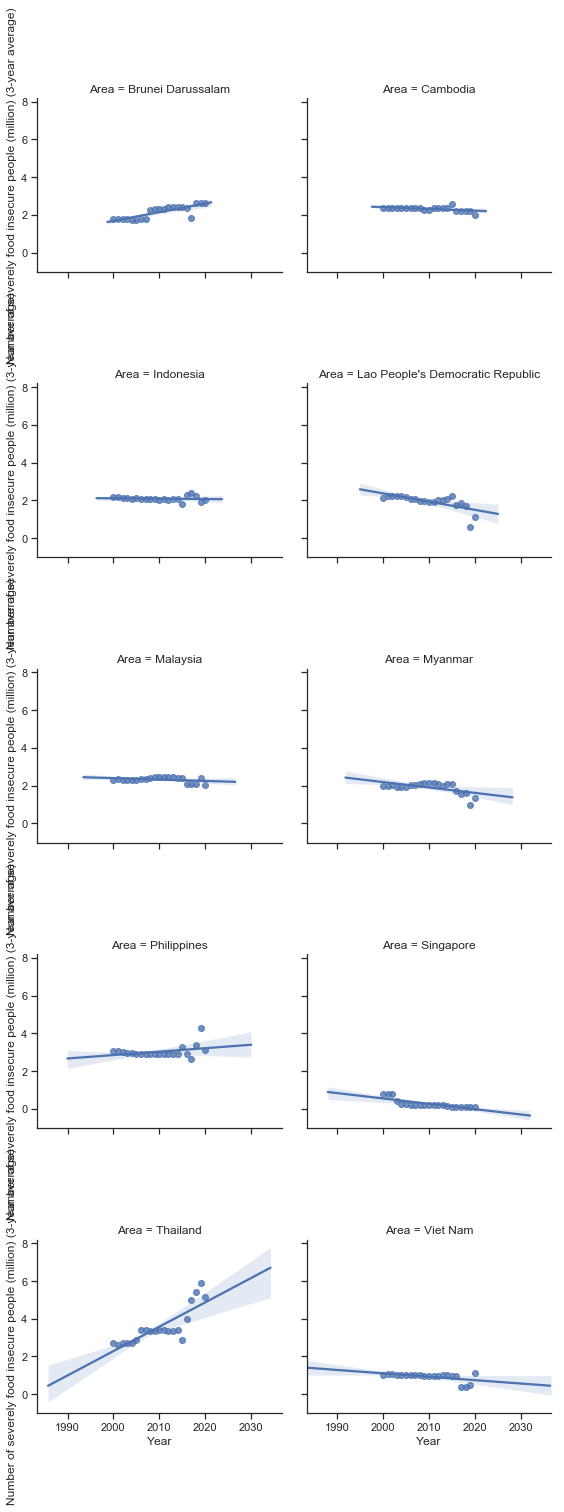

In [44]:
import seaborn as sns
sns.set(style = 'ticks')
sns.lmplot(x = 'Year',
           y = 'Number of severely food insecure people (million) (3-year average)',
           col = 'Area',
           data = df_cleaned,
           col_wrap = 2,
           height = 4)

##### Split into different datasets by Area

In [45]:
data = df_cleaned.copy()
data = data.iloc[:, :-1]
df_Brunei = data[data['Area'].isin(['Brunei Darussalam'])].iloc[:,1:]
df_Cambodia = data[data['Area'].isin(['Cambodia'])].iloc[:,1:]
df_Indonesia = data[data['Area'].isin(['Indonesia'])].iloc[:,1:]
df_Lao = data[data['Area'].isin(["Lao People's Democratic Republic"])].iloc[:,1:]
df_Malaysia = data[data['Area'].isin(['Malaysia'])].iloc[:,1:]
df_Myanmar = data[data['Area'].isin(['Myanmar'])].iloc[:,1:]
df_Philippines = data[data['Area'].isin(['Philippines'])].iloc[:,1:]
df_Singapore = data[data['Area'].isin(['Singapore'])].iloc[:,1:]
df_Thailand = data[data['Area'].isin(['Thailand'])].iloc[:,1:]
df_VietNam = data[data['Area'].isin(['Viet Nam'])].iloc[:,1:]

##### Save data

In [46]:
df_cleaned.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-cleaned.csv',index=False)
df_Brunei.to_csv(r'Brunei_Consumer Price&Food Security Indicators.csv',index=False)
df_Cambodia.to_csv(r'Cambodia_Consumer Price&Food Security Indicators.csv',index=False)
df_Indonesia.to_csv(r'Indonesia_Consumer Price&Food Security Indicators.csv',index=False)
df_Lao.to_csv(r'Lao_Consumer Price&Food Security Indicators.csv',index=False)
df_Malaysia.to_csv(r'Malaysia_Consumer Price&Food Security Indicators.csv',index=False)
df_Myanmar.to_csv(r'Myanmar_Consumer Price&Food Security Indicators.csv',index=False)
df_Philippines.to_csv(r'Philippines_Consumer Price&Food Security Indicators.csv',index=False)
df_Singapore.to_csv(r'Singapore_Consumer Price&Food Security Indicators.csv',index=False)
df_Thailand.to_csv(r'Thailand_Consumer Price&Food Security Indicators.csv',index=False)
df_VietNam.to_csv(r'VietNam_Consumer Price&Food Security Indicators.csv',index=False)